<a href="https://colab.research.google.com/github/Drodricks0/Sales_Prediction/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

filename = '/content/sales_predictions (2).csv'
df = pd.read_csv(filename)
df.head()                           #Week 1 Entry

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [33]:
df.shape                #8523 rows with 12 columns

(8523, 12)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [35]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [36]:
df = df.replace(to_replace= "LF", value="Low Fat")

df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [37]:
df = df.replace(to_replace= "low fat", value="Low Fat")

df['Item_Fat_Content'].value_counts()                                   #Corrected Item Fat Content Column by combining low fat types of counts

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [38]:
df = df.replace(to_replace= "reg", value="Regular")

df['Item_Fat_Content'].value_counts()                                   #Corrected Item Fat Content Column by combining Regualr types of counts

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [39]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [40]:
df['Outlet_Size'].fillna(value ='No Size', inplace = True)                       #Filled Outlet Size with 'No size' so that I keep data points instead of dropping them

In [41]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
df = df.drop(columns=['Item_Weight'])
                                                        #Week 2 Entry
df.head()                                               #decided to drop Item_Weight due to lack of relativity with other columns

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


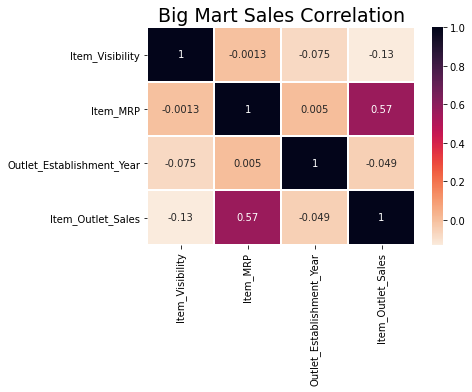

In [43]:
corr = df.corr()
sns.heatmap(corr, cmap = 'rocket_r', linewidth = 1, annot = True)
plt.title('Big Mart Sales Correlation', size = 19);      #this is meant for identifying any correlations in the immediate data

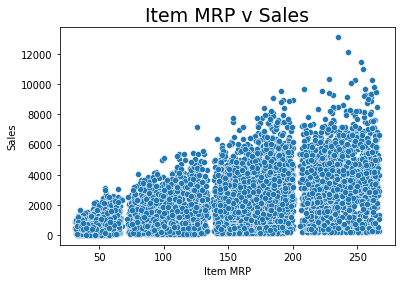

In [44]:
outlet_sales = df['Item_Outlet_Sales']
mrp = df['Item_MRP']

sns.scatterplot(x=mrp, y=outlet_sales)
plt.xlabel('Item MRP')
plt.ylabel('Sales')
plt.title('Item MRP v Sales', size=19);                       

In [45]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


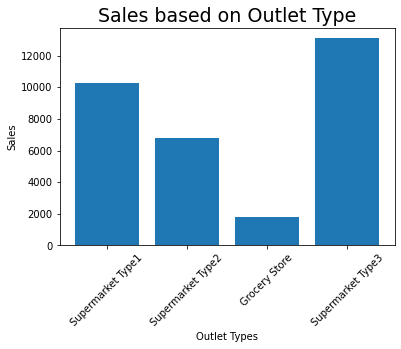

In [46]:
outlet_type = df['Outlet_Type']


plt.bar(outlet_type,outlet_sales)
plt.xticks(rotation=45)
plt.xlabel('Outlet Types')
plt.ylabel('Sales')
plt.title('Sales based on Outlet Type', size=19);

In [47]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


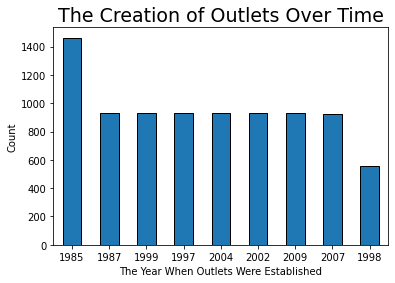

In [48]:
df['Outlet_Establishment_Year'].value_counts().plot(kind = 'bar', edgecolor = 'black')    #includes "Grocery Stores"
plt.xticks(rotation = 0)
plt.xlabel('The Year When Outlets Were Established')
plt.ylabel('Count')
plt.title('The Creation of Outlets Over Time', size=19);

''

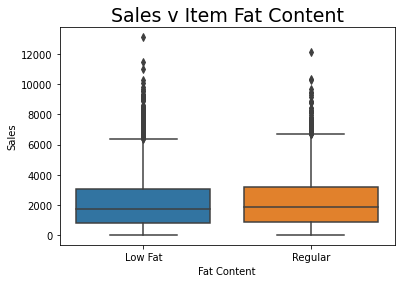

In [49]:
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df)
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.title('Sales v Item Fat Content', size=19)
;

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


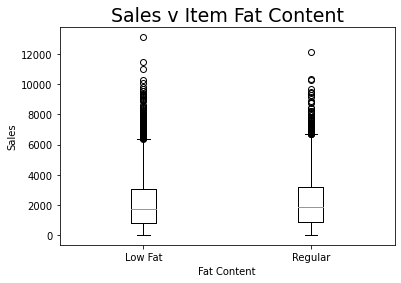

In [50]:
low_fat = df.loc[df['Item_Fat_Content'] == 'Low Fat', 'Item_Outlet_Sales'].values         #Week 4 Submission 
regular = df.loc[df['Item_Fat_Content'] == 'Regular', 'Item_Outlet_Sales'].values

plt.boxplot([low_fat,regular], labels=['Low Fat','Regular'])
plt.xlabel('Fat Content')
plt.ylabel('Sales')
plt.title('Sales v Item Fat Content', size=19);

In [51]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,No Size,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [52]:
reg_df = df
reg_df.drop(columns =['Item_Identifier','Outlet_Identifier','Item_Visibility'], inplace = True)
reg_df.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,Fruits and Vegetables,182.0950,1998,No Size,Tier 3,Grocery Store,732.3800
4,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [53]:
reg_df = pd.get_dummies(reg_df, columns = ['Item_Fat_Content','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'], drop_first = False)
reg_df.head()

,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_No Size,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,249.8092,3735.1380,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,48.2692,443.4228,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0
2,141.6180,2097.2700,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
3,182.0950,732.3800,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
4,53.8614,994.7052,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [54]:
y = reg_df['Item_Outlet_Sales']
X = reg_df.drop(columns ='Item_Outlet_Sales')

In [55]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, = train_test_split(X,y,random_state=42)

reg = LinearRegression()

reg.fit(X_train,y_train)
reg.fit(X_test,y_test)

train_preds = reg.predict(X_train)
test_preds = reg.predict(X_test)

train_score = reg.score(X_train,y_train)
print(train_score)

0.5546334336870171


In [56]:
test_score = reg.score(X_test,y_test)
print(test_score)

0.5752794369726535


In [57]:
r2_score(y_test,test_preds)       # 57% of the data is represented by the true data set.

0.5752794369726535

In [58]:
mean_absolute_error(y_test,test_preds)

796.1566386674141

In [59]:
mean_squared_error(y_test,test_preds)

1171794.3870569037

In [60]:
np.sqrt(mean_squared_error(y_test,test_preds))    #  +/- $1082 of error of the predicted $ amount.

1082.494520566688

In [61]:
importance = reg.coef_

for i,v in enumerate(importance):                         #Week 5 submission
	print('Feature: %0d, Score: %.1f' % (i,v))              #https://machinelearningmastery.com/calculate-feature-importance-with-python/

Feature: 0, Score: 15.2
Feature: 1, Score: 7.8
Feature: 2, Score: -7.8
Feature: 3, Score: 28.6
Feature: 4, Score: 107.5
Feature: 5, Score: -90.3
Feature: 6, Score: 48.0
Feature: 7, Score: 169.0
Feature: 8, Score: -67.1
Feature: 9, Score: -3.6
Feature: 10, Score: -19.9
Feature: 11, Score: -85.1
Feature: 12, Score: -143.9
Feature: 13, Score: 51.9
Feature: 14, Score: 29.7
Feature: 15, Score: -68.2
Feature: 16, Score: 44.8
Feature: 17, Score: 38.7
Feature: 18, Score: -40.0
Feature: 19, Score: 174.5
Feature: 20, Score: -154.4
Feature: 21, Score: 526.0
Feature: 22, Score: -307.4
Feature: 23, Score: -109.1
Feature: 24, Score: -99.0
Feature: 25, Score: 111.7
Feature: 26, Score: 177.6
Feature: 27, Score: -319.8
Feature: 28, Score: -154.4
Feature: 29, Score: 540.6
Feature: 30, Score: -228.8
Feature: 31, Score: -157.3
Feature: 32, Score: -378.1
Feature: 33, Score: 190.2
Feature: 34, Score: 187.9
Feature: 35, Score: -1102.4
Feature: 36, Score: 452.7
Feature: 37, Score: -319.8
Feature: 38, Score: 9